# Data Analysis for 10 Year Treasury Note Futures,ETH (June 2018)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Data Import

In [2]:
# Read the input file and save it as a dataframe
df = pd.read_csv('zn.csv').fillna('0')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,5/3/1982,63.81,63.88,63.50,63.50,0,0
1,5/4/1982,63.44,64.12,63.38,64.00,0,0
2,5/5/1982,64.19,64.38,63.94,64.12,0,0
3,5/6/1982,64.62,65.06,64.56,65.06,0,0
4,5/7/1982,65.31,65.38,64.94,65.31,0,0


### 2. Data Cleansing

In [3]:
# Remove unwanted columns
df = df.drop('OpenInt',axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,5/3/1982,63.81,63.88,63.50,63.50,0
1,5/4/1982,63.44,64.12,63.38,64.00,0
2,5/5/1982,64.19,64.38,63.94,64.12,0
3,5/6/1982,64.62,65.06,64.56,65.06,0
4,5/7/1982,65.31,65.38,64.94,65.31,0


In [4]:
# Buy on the Open and sell on the close
df['Profit'] = df['Close']-df['Open']
df.head()

,Date,Open,High,Low,Close,Volume,Profit
0,5/3/1982,63.81,63.88,63.50,63.50,0,-0.31
1,5/4/1982,63.44,64.12,63.38,64.00,0,0.56
2,5/5/1982,64.19,64.38,63.94,64.12,0,-0.07
3,5/6/1982,64.62,65.06,64.56,65.06,0,0.44
4,5/7/1982,65.31,65.38,64.94,65.31,0,0.00


In [5]:
df['ProfitLoss'] = [1 if x > 0 else 0 for x in df['Profit']]
df.head()

,Date,Open,High,Low,Close,Volume,Profit,ProfitLoss
0,5/3/1982,63.81,63.88,63.50,63.50,0,-0.31,0
1,5/4/1982,63.44,64.12,63.38,64.00,0,0.56,1
2,5/5/1982,64.19,64.38,63.94,64.12,0,-0.07,0
3,5/6/1982,64.62,65.06,64.56,65.06,0,0.44,1
4,5/7/1982,65.31,65.38,64.94,65.31,0,0.00,0


In [6]:
df['Date']= pd.to_datetime(df['Date'])

In [7]:
# Add columns to extract Day, Year and Month
df['Day'] = df['Date'].dt.weekday_name
df['Year'],df['Month'] = df['Date'].dt.year,df['Date'].dt.month
df.head()

,Date,Open,High,Low,Close,Volume,Profit,ProfitLoss,Day,Year,Month
0,1982-05-03,63.81,63.88,63.50,63.50,0,-0.31,0,Monday,1982,5
1,1982-05-04,63.44,64.12,63.38,64.00,0,0.56,1,Tuesday,1982,5
2,1982-05-05,64.19,64.38,63.94,64.12,0,-0.07,0,Wednesday,1982,5
3,1982-05-06,64.62,65.06,64.56,65.06,0,0.44,1,Thursday,1982,5
4,1982-05-07,65.31,65.38,64.94,65.31,0,0.00,0,Friday,1982,5


#       Analysis by Day of the week

In [8]:
# day_df = df[df.columns[6:9]]
day_df = df[['Day','Profit','ProfitLoss']]
day_df.head()

,Day,Profit,ProfitLoss
0,Monday,-0.31,0
1,Tuesday,0.56,1
2,Wednesday,-0.07,0
3,Thursday,0.44,1
4,Friday,0.00,0


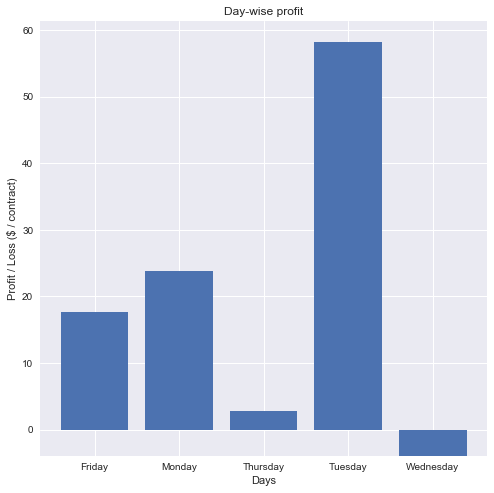

In [9]:
# Groupby the day and plot the profit/loss
day_grp = day_df.groupby('Day')
dic={}
for name,group in day_grp:
    #print(name)
    #print(group['Profit'].sum())
    #print('--------------------------')
    dic[name] = group['Profit'].sum()

names = list(dic.keys())
values = list(dic.values())
plt.figure(figsize=(8,8))
plt.bar(range(len(dic)),values,tick_label=names)
plt.xlabel('Days')
plt.ylabel('Profit / Loss ($ / contract)')
plt.title('Day-wise profit')
plt.show()

## Analysis by year (May 1982 to March 2018) 

In [10]:
year_df = df[['Year','Profit','ProfitLoss']]
year_df.head()

,Year,Profit,ProfitLoss
0,1982,-0.31,0
1,1982,0.56,1
2,1982,-0.07,0
3,1982,0.44,1
4,1982,0.00,0


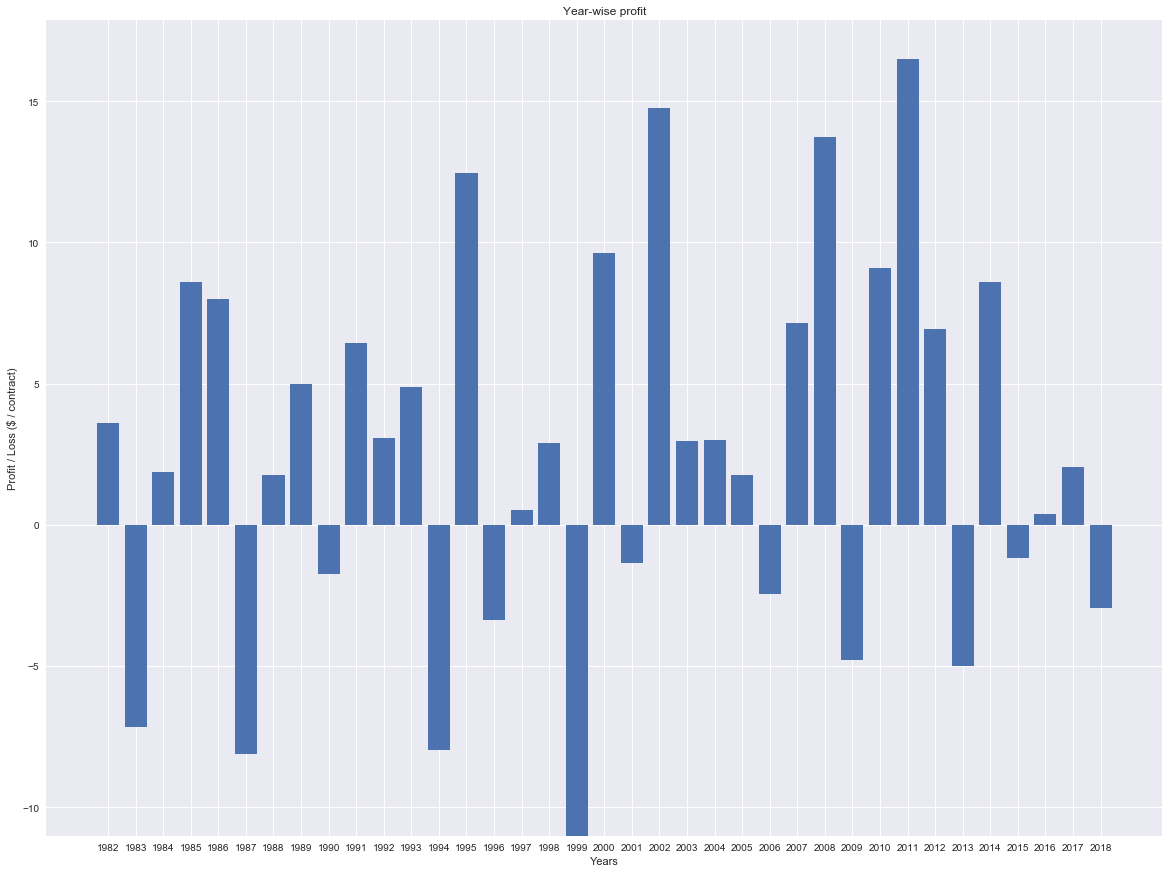

In [11]:
# Groupby the year and plot the profit/loss
year_grp = year_df.groupby('Year')
dic2={}
for yname,ygroup in year_grp:
    #print(yname)
    #print(group['Profit'].sum())
    #print('--------------------------')
    dic2[yname] = ygroup['Profit'].sum()

ynames = list(dic2.keys())
yvalues = list(dic2.values())
plt.figure(figsize=(20,15))
plt.bar(range(len(dic2)),yvalues,tick_label=ynames)
plt.xlabel('Years')
plt.ylabel('Profit / Loss ($ / contract)')
plt.title('Year-wise profit')
plt.show()

## Analysis by month (May 1982 to March 2018)

In [12]:
mon_df = df[['Month','Profit','ProfitLoss']]
mon_df.head()

,Month,Profit,ProfitLoss
0,5,-0.31,0
1,5,0.56,1
2,5,-0.07,0
3,5,0.44,1
4,5,0.00,0


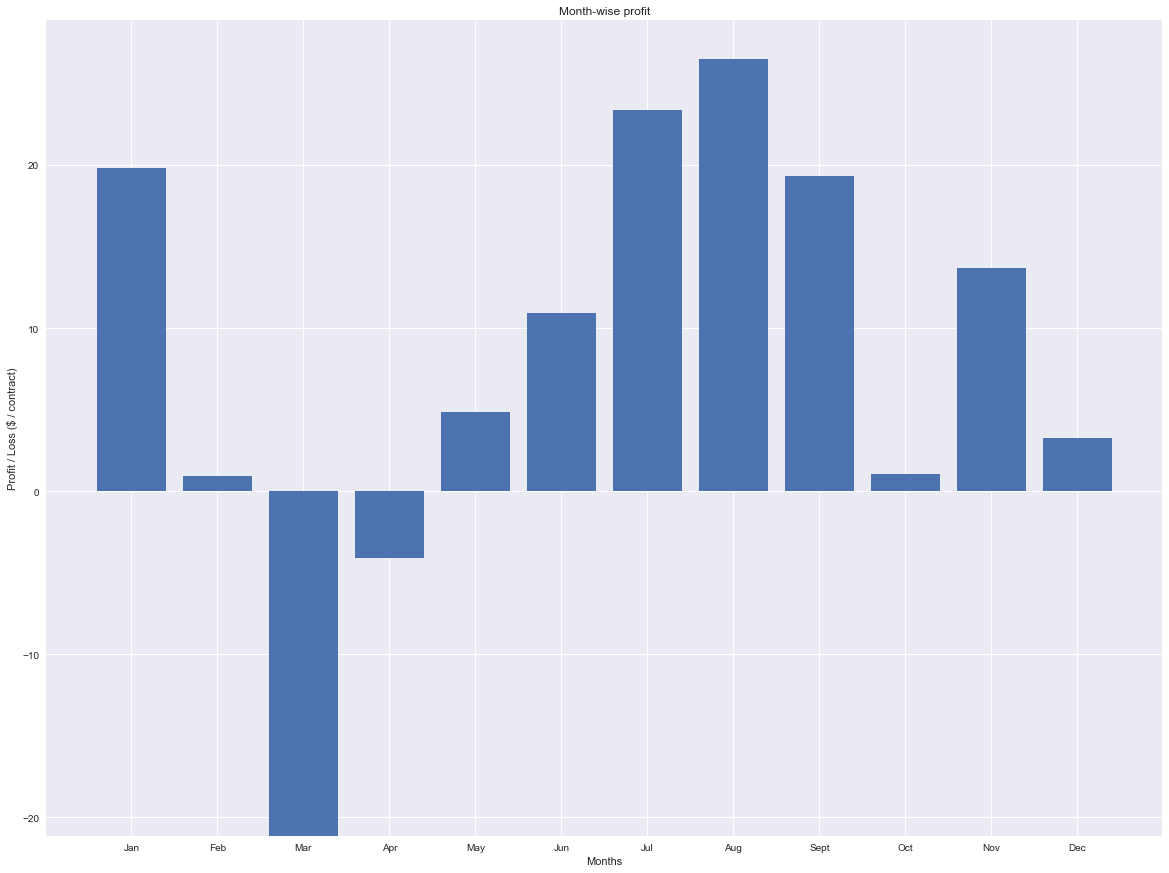

In [13]:
# Groupby the year and plot the profit/loss
mon_grp = mon_df.groupby('Month')
dic3={}
for mname,mgroup in mon_grp:
    #print(mname)
    #print(mgroup['Profit'].sum())
    #print('--------------------------')
    dic3[mname] = mgroup['Profit'].sum()

mnames = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
mvalues = list(dic3.values())
plt.figure(figsize=(20,15))
plt.bar(range(len(dic3)),mvalues,tick_label=mnames)
plt.xlabel('Months')
plt.ylabel('Profit / Loss ($ / contract)')
plt.title('Month-wise profit')
plt.show()

## Results:
         1) If we just bought and sold one future contract everyday since May 1982, 
              a) Best year : 2011
                 Worst Year : 1999
              b) Best Month : August
                 Worst Month : March
              c) Best Day : Tuesday
                 Worst Day : Wednesday